<a href="https://colab.research.google.com/github/lustraka/nd00333_AZMLND_Optimizing_a_Pipeline_in_Azure-Starter_Files/blob/master/sandbox-1/Colab_BankMarketingEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
url_path = "https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv"

In [3]:
df = pd.read_csv(url_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [4]:
df.describe().round(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000,32950.000,32950.000,32950.000,32950.000,32950.000,32950.000,32950.000,32950.000,32950.000
mean,40.040,257.335,2.562,962.175,0.175,0.076,93.574,-40.519,3.616,5166.860
std,10.432,257.332,2.764,187.647,0.497,1.572,0.579,4.623,1.736,72.208
min,17.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.634,4963.600
25%,32.000,102.000,1.000,999.000,0.000,-1.800,93.075,-42.700,1.344,5099.100
50%,38.000,179.000,2.000,999.000,0.000,1.100,93.749,-41.800,4.857,5191.000
75%,47.000,318.000,3.000,999.000,0.000,1.400,93.994,-36.400,4.961,5228.100
max,98.000,4918.000,56.000,999.000,7.000,1.400,94.767,-26.900,5.045,5228.100


In [5]:
for col in ['pdays', 'previous']:
  print(df.groupby(col)[col].count())

pdays
0         12
1         22
2         55
3        350
4         93
5         39
6        326
7         47
8         13
9         54
10        39
11        24
12        48
13        30
14        16
15        22
16         8
17         7
18         7
19         3
20         1
21         2
22         2
26         1
27         1
999    31728
Name: pdays, dtype: int64
previous
0    28394
1     3703
2      603
3      175
4       56
5       14
6        4
7        1
Name: previous, dtype: int64


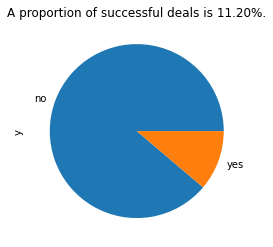

In [6]:
y_count = df.groupby(by='y')['y'].count()
y_count.plot.pie(title=f'A proportion of successful deals is {y_count.values[1]/y_count.values.sum():.2%}.')

In [7]:
dflb = df.copy()
for col in dflb.select_dtypes('object'):
  dflb[col], _ = dflb[col].factorize()
dflb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  int64  
 2   marital         32950 non-null  int64  
 3   education       32950 non-null  int64  
 4   default         32950 non-null  int64  
 5   housing         32950 non-null  int64  
 6   loan            32950 non-null  int64  
 7   contact         32950 non-null  int64  
 8   month           32950 non-null  int64  
 9   day_of_week     32950 non-null  int64  
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  int64  
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [8]:
corrwith_y = dflb.corrwith(dflb.y).round(4)
corrwith_y.loc[corrwith_y.abs() > 0.1].sort_values(key=np.abs, ascending=False)

y                 1.0000
duration          0.4054
nr.employed      -0.3532
pdays            -0.3219
euribor3m        -0.3055
emp.var.rate     -0.2963
previous          0.2288
month             0.1915
contact          -0.1436
cons.price.idx   -0.1346
poutcome          0.1310
dtype: float64

In [9]:
dfoh = df.copy()
for col in dfoh.select_dtypes('object').columns:
  if col != 'y':
    dfoh = dfoh.join(pd.get_dummies(dfoh[col], prefix=str(col)))
    dfoh.drop(col, axis=1, inplace=True)
  else:
    dfoh[col], _ = df[col].factorize()

dfoh.shape

(32950, 64)

In [10]:
for col in dfoh.columns:
  if '_' in col:
    print(col + '\t', dfoh[col].sum())

job_admin.	 8339
job_blue-collar	 7356
job_entrepreneur	 1193
job_housemaid	 854
job_management	 2343
job_retired	 1388
job_self-employed	 1140
job_services	 3161
job_student	 682
job_technician	 5426
job_unemployed	 793
job_unknown	 275
marital_divorced	 3676
marital_married	 19966
marital_single	 9242
marital_unknown	 66
education_basic.4y	 3333
education_basic.6y	 1847
education_basic.9y	 4860
education_high.school	 7553
education_illiterate	 15
education_professional.course	 4229
education_university.degree	 9717
education_unknown	 1396
default_no	 26064
default_unknown	 6883
default_yes	 3
housing_no	 14936
housing_unknown	 782
housing_yes	 17232
loan_no	 27166
loan_unknown	 782
loan_yes	 5002
contact_cellular	 20946
contact_telephone	 12004
month_apr	 2108
month_aug	 4882
month_dec	 144
month_jul	 5753
month_jun	 4251
month_mar	 421
month_may	 11073
month_nov	 3296
month_oct	 569
month_sep	 453
day_of_week_fri	 6259
day_of_week_mon	 6802
day_of_week_thu	 6937
day_of_week_tue	 648

In [11]:
def get_X_y(data, encode_cat='onehot'):
  """Prepare features and a target in line with exploratory data analysis.
  For `encode_cat` use either 'onehot' or 'label'."""
  
  df = data.copy()

  # Separate and encode the target
  y = df.pop('y').apply(lambda s: 1 if s == 'yes' else 0)

  # Binarize 'pdays' feature, as it doesn't matter how many days passed
  # due to prevalence of 'no previous contact' cases (31728)
  df['pdays'] = df['pdays'].apply(lambda i: 0 if i == 999 else 1)

  # Drop a potential data leakage columns including
  # high correlated 'duration (of a call)' (coef 0.41).
  # Features related with the last contact of the current
  # campaign are not know while planning a new campaign!
  for col in ['contact', 'month', 'day_of_week', 'duration', 'campaign']:
    df.drop(col, axis=1, inplace=True)

  # Drop an uninformative column 'default'
  # which has only 3 'yes'.
  df.drop('default', axis=1, inplace=True)

  # Encode the non-numeric columns
  for col in df.select_dtypes('object').columns:
    if encode_cat == 'onehot':
      df = df.join(pd.get_dummies(df[col], prefix=col))
      df.drop(col, axis=1, inplace=True)
    else:  # Label encoding
      df[col], _ = df[col].factorize()

  # Return features and the target
  return df, y

In [12]:
x, y = get_X_y(df, 'onehot')
x.shape, y.shape

((32950, 41), (32950,))

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  int64  
 1   pdays                          32950 non-null  int64  
 2   previous                       32950 non-null  int64  
 3   emp.var.rate                   32950 non-null  float64
 4   cons.price.idx                 32950 non-null  float64
 5   cons.conf.idx                  32950 non-null  float64
 6   euribor3m                      32950 non-null  float64
 7   nr.employed                    32950 non-null  float64
 8   job_admin.                     32950 non-null  uint8  
 9   job_blue-collar                32950 non-null  uint8  
 10  job_entrepreneur               32950 non-null  uint8  
 11  job_housemaid                  32950 non-null  uint8  
 12  job_management                 32950 non-null 

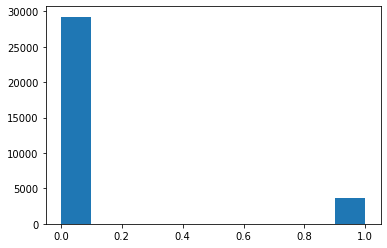

In [14]:
y.hist(grid=False)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(f"Test size is {len(x_test)/len(x):.2f}.")
print(f"x_train.shape = {x_train.shape},\t x_test.shape = {x_test.shape},")
print(f"y_train.shape = {y_train.shape},\t y_test.shape = {y_test.shape}.")

Test size is 0.25.
x_train.shape = (24712, 41),	 x_test.shape = (8238, 41),
y_train.shape = (24712,),	 y_test.shape = (8238,).
